<a href="https://colab.research.google.com/github/Dzy00/CHL5230-Datathon-5/blob/main/CHL5230_datathon5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CHL5230 Datathon 5


---
### Exploratory Data Analysis


(999999, 14)
Index(['alx', 'aly', 'alz', 'glx', 'gly', 'glz', 'arx', 'ary', 'arz', 'grx',
       'gry', 'grz', 'Activity', 'subject'],
      dtype='object')
alx         0
aly         0
alz         0
glx         0
gly         0
glz         0
arx         0
ary         0
arz         0
grx         0
gry         0
grz         0
Activity    0
subject     0
dtype: int64


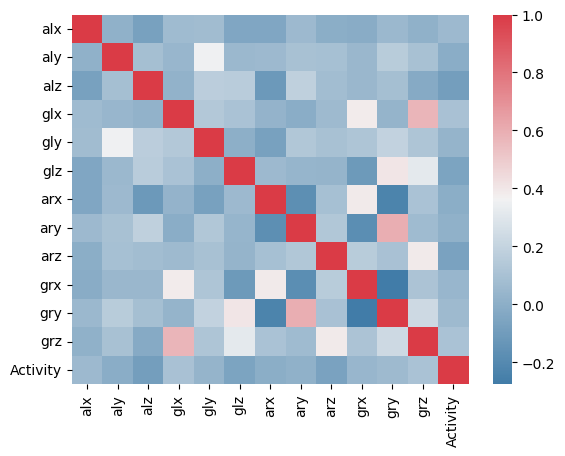

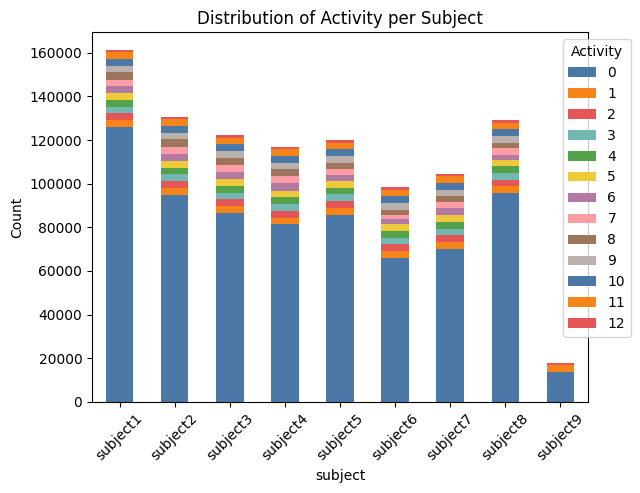

In [1]:
# CHL5230 datathon 5 explore

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')


# read dataset
# Load the CSV file into a DataFrame
file_path = 'mhealth.csv'
data = pd.read_csv(file_path)

data.head()

# check dimension of the dataset
print(data.shape)

# list the columns of the dataframe
print(data.columns)

# check missing value
print(data.isnull().sum()) # 0 NA

# understand data
data['subject'].unique()
data['Activity'].unique()

# Group the dataset by the 'subject' column and check number of records each subject has
data.groupby('subject').apply(len)

# randomly sample 20000 rows because the dataset is too large and we are using computationally intensive methods
# data = data.sample(n=20000)

########################################## plots
# correlation matrix between variables
Mcorr = data.corr()
cmap = sns.diverging_palette(240, 10, as_cmap=True) # customerize cmap color
sns.heatmap(Mcorr, annot=False, cmap=cmap)
plt.show()

# distributin of activities
counts = data['Activity'].value_counts()
# Define color sequence
colors = px.colors.qualitative.T10 #Set3
fig = px.pie(
    names=counts.index,
    values=counts.values,
    hole=0.5,  # size of the hole, 0.5 means 50%
    title='Distribution of Activity',
    color_discrete_sequence=colors  # apply colors
)
fig.show()

# plot activity per subject
# pivot table
pivot = pd.pivot_table(data[['subject','Activity']], index='subject', columns='Activity', aggfunc=len)
# plot stacked bar
ax = pivot.plot.bar(stacked=True, color = colors)
ax.set_title('Distribution of Activity per Subject')
ax.set_ylabel('Count')
subjects = data['subject'].unique()
ax.set_xticklabels(subjects, rotation=45)
ax.legend(title='Activity', bbox_to_anchor=(1.1, 1.0))
plt.show()







---


### Recurrent Neural Network

In [2]:
# CHL5230 datathon 5 explore + RNN

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample

import warnings
warnings.filterwarnings('ignore')


# read dataset
# Load the CSV file into a DataFrame
file_path = 'mhealth.csv'
data = pd.read_csv(file_path)

# randomly sample 20000 rows because the dataset is too large and we are using computationally intensive methods
# data = data.sample(n=20000)

########################################## RNN
##### split to train & test
# Grouping by subject and creating a list of dataframes, one per group
grouped = data.groupby('subject')
grouped_dfs = [group for _, group in grouped]

# Splitting the groups into training and test sets with an 80:20 ratio
train_groups, test_groups = train_test_split(grouped_dfs, test_size=0.2, random_state=20)

# Reassembling the training and test datasets from the groups
train_df = pd.concat(train_groups)
test_df = pd.concat(test_groups)

# Displaying the shape of the training and test sets
train_df_shape = train_df.shape
test_df_shape = test_df.shape

train_df_shape, test_df_shape

##### normalization
# Identifying numerical columns (excluding 'subject' and 'Activity')
numerical_columns = train_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_columns.remove('Activity')

# Initializing the StandardScaler
scaler = StandardScaler()

# Fitting the scaler to the training data and transforming both training and test data
train_df[numerical_columns] = scaler.fit_transform(train_df[numerical_columns])
test_df[numerical_columns] = scaler.transform(test_df[numerical_columns])

# Checking the first few rows of the normalized training data
train_df.head()
train_df.shape

##### Class imbalance
# Checking the class distribution in the 'Activity' column of the training set
class_distributio = train_df.groupby('subject')['Activity'].value_counts()
# df_groupby = data.groupby(['subject', 'Activity']).size()
train_df[train_df['subject'] == 'subject1']['Activity'].value_counts()

'''
# Grouping the original training data by 'subject'
grouped_by_sub = train_df.groupby('subject')

# Creating separate lists for each class NOT WORKING FOR THIS DATASET
groups_class_0 = [grouped_by_sub.get_group(s) for s in grouped_by_sub.groups if grouped_by_sub.get_group(s)['Activity'].iloc[-1] == 0]
groups_class_1 = [grouped_by_sub.get_group(s) for s in grouped_by_sub.groups if grouped_by_sub.get_group(s)['Activity'].iloc[-1] == 1]
groups_class_2 = [grouped_by_sub.get_group(s) for s in grouped_by_sub.groups if grouped_by_sub.get_group(s)['Activity'].iloc[-1] == 2]
groups_class_3 = [grouped_by_sub.get_group(s) for s in grouped_by_sub.groups if grouped_by_sub.get_group(s)['Activity'].iloc[-1] == 3]
groups_class_4 = [grouped_by_sub.get_group(s) for s in grouped_by_sub.groups if grouped_by_sub.get_group(s)['Activity'].iloc[-1] == 4]
groups_class_5 = [grouped_by_sub.get_group(s) for s in grouped_by_sub.groups if grouped_by_sub.get_group(s)['Activity'].iloc[-1] == 5]
groups_class_6 = [grouped_by_sub.get_group(s) for s in grouped_by_sub.groups if grouped_by_sub.get_group(s)['Activity'].iloc[-1] == 6]
groups_class_7 = [grouped_by_sub.get_group(s) for s in grouped_by_sub.groups if grouped_by_sub.get_group(s)['Activity'].iloc[-1] == 7]
groups_class_8 = [grouped_by_sub.get_group(s) for s in grouped_by_sub.groups if grouped_by_sub.get_group(s)['Activity'].iloc[-1] == 8]
groups_class_9 = [grouped_by_sub.get_group(s) for s in grouped_by_sub.groups if grouped_by_sub.get_group(s)['Activity'].iloc[-1] == 9]
groups_class_10 = [grouped_by_sub.get_group(s) for s in grouped_by_sub.groups if grouped_by_sub.get_group(s)['Activity'].iloc[-1] == 10]
groups_class_11 = [grouped_by_sub.get_group(s) for s in grouped_by_sub.groups if grouped_by_sub.get_group(s)['Activity'].iloc[-1] == 11]
groups_class_12 = [grouped_by_sub.get_group(s) for s in grouped_by_sub.groups if grouped_by_sub.get_group(s)['Activity'].iloc[-1] == 12]
'''
# Grouping the original training data by 'subject' and 'Activity'
grouped_by_sub = train_df.groupby(['subject', 'Activity'])

# oversample the minority class by replicating i.e. entire sequence of subject 1's activity 12, subject 2's activity 11, etc








